The Sparks Foundation

GRIP JUNE 2022

Name: SAKIB ALI

Data Science & Business Analytics Intern

Task 2:Prediction using Unsupervised ML

Task Description:From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

Importing Library 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

Importing the dataset

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Iris(1).csv')

In [ ]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
#printing the first 5 values
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# check the info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
# check the description of student_score data
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
#Let's check for unique classes in the dataset
print(data.Species.nunique())
print(data.Species.value_counts())

3
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


Data Visualization

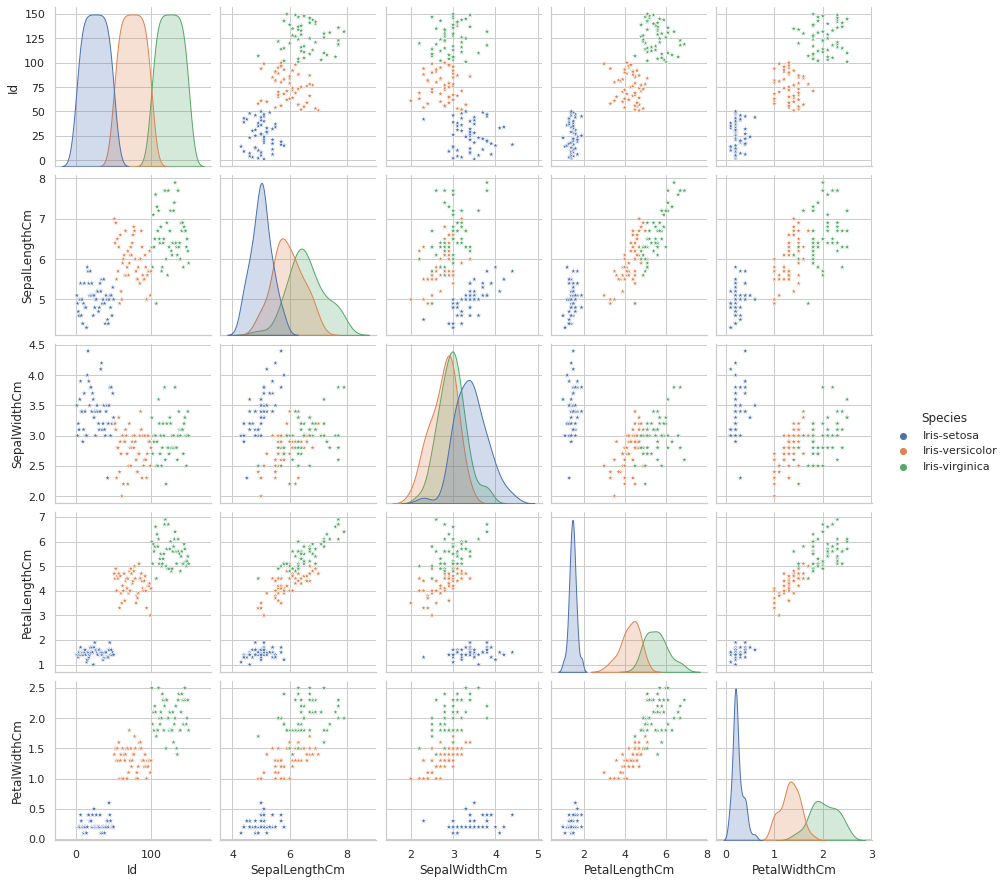

In [ ]:
sns.pairplot(data, hue='Species', markers='*')
plt.show()

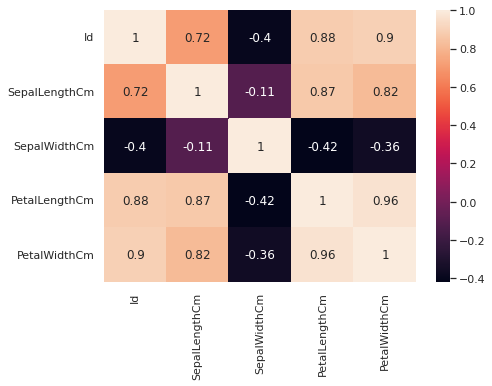

In [ ]:
#This is needed for the analysis of two variables, for determining the empirical relationship between them.
plt.figure(figsize=(7,5))
sns.heatmap(data.corr(), annot=True)
plt.show()

Converting String to Numeric

In [ ]:
labelencoder = LabelEncoder()
X = data.iloc[:,5].values
data.iloc[:,5] = labelencoder.fit_transform(X)
X = X.reshape(-1,1) 

In [ ]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,1,0
1,2,4.9,3.0,1.4,1,0
2,3,4.7,3.2,1.3,1,0
3,4,4.6,3.1,1.5,1,0
4,5,5.0,3.6,1.4,1,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,19,2
146,147,6.3,2.5,5.0,15,2
147,148,6.5,3.0,5.2,16,2
148,149,6.2,3.4,5.4,19,2


Applying Scaling Technique 

In [ ]:
scaler = MinMaxScaler()
norm_mydata=data.copy()
def minmaxscaler(x):
    for columnName, columnData in x.iteritems():
        x[columnName] = scaler.fit_transform(np.array(columnData).reshape(-1, 1))    

minmaxscaler(norm_mydata)
norm_mydata.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0.000000,0.222222,0.625000,0.067797,0.047619,0.0
1,0.006711,0.166667,0.416667,0.067797,0.047619,0.0
2,0.013423,0.111111,0.500000,0.050847,0.047619,0.0
3,0.020134,0.083333,0.458333,0.084746,0.047619,0.0
4,0.026846,0.194444,0.666667,0.067797,0.047619,0.0


Creation of K elbowto choose the right number of K 

Text(0.5, 1.0, 'Elbow Curve to find optimum K')

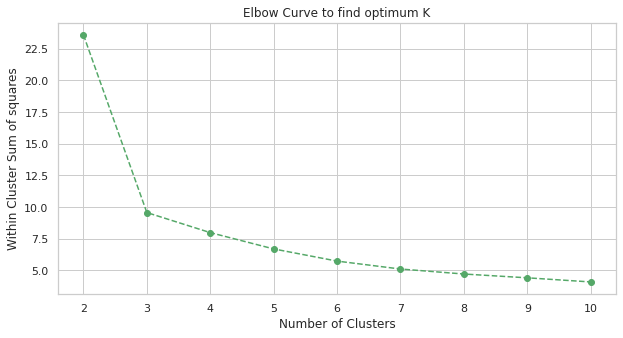

In [ ]:
k= list(range(2,11))
sum_of_squared_distances = []
for i in k:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(norm_mydata)
    sum_of_squared_distances.append(kmeans.inertia_) 
plt.figure(figsize=(10, 5))
plt.plot(k, sum_of_squared_distances, 'go--')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of squares')
plt.title('Elbow Curve to find optimum K')

Building Model

In [ ]:
kmeans3 = KMeans(n_clusters = 3)

kmeans3.fit(norm_mydata)

y_kmeans = kmeans3.fit_predict(norm_mydata)
print(y_kmeans)

data['Cluster'] = y_kmeans+1

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


Visualizing Clusters

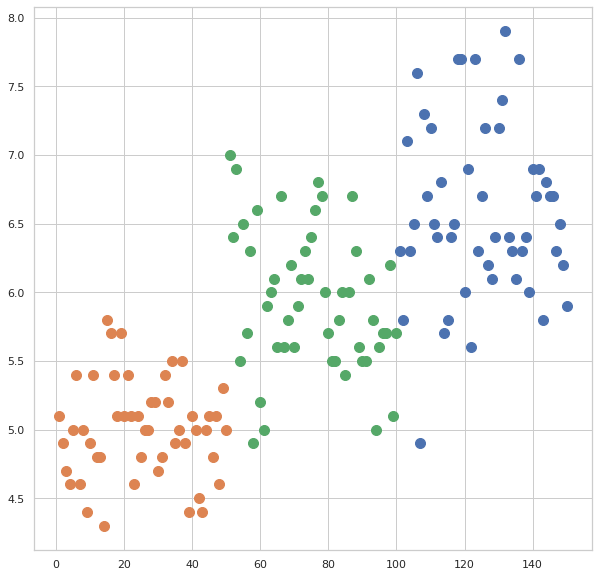

In [ ]:
x = data.iloc[:, [0, 1, 2, 3]].values
plt.figure(figsize=(10,10))
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,label='Iris-setosa')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,label='Iris-versicolour')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,label='Iris-virginica')
